# Trabajo de Mentoria - DiploDatos

# Grupo A
    
Integrantes: 
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
        
        
## Consigna Entrega nº 1
Aqui esta el link a los datasets, donde encontraremos acciones, cryptomonedas, indicadores, Noticias y algunos labels con los que iremos trabajando durante el año.

https://drive.google.com/drive/folders/1PKno2IxagFiElYqMR1Xy7vpmuUEIMD2J?usp=sharing

El primer dataset consiste en
List item
Ticker
Titulo de noticia
Contenido de Noticia
Fecha de noticia
El segundo dataset consiste en
Ticker
200 Indicadores financieros
Año
Class (Fue una buena inversión si o no ese año para ese ticker)
Analisis y Visualizacion
Exploraremos los datos importando los CSV en una notebook Se proponen algunas ideas para arrancar:

### Del dataset financial_data.csv:
Explorar indicadores, elegir algunos hasta 10, para identificar límites y distribución, extraer medidas de tendencia central, medidas de dispersión, outliers, y si encontramos valores NaN.

Visualizar distribuciones de los índices financieros

Graficar cantidad de registros agrupados por año

Graficar cantidad de registros agrupados por sector

Distribución de PRICE VAR

Distribución de PRICE VAR agrupados por año y por sector

Crear Matriz de correlación entre indicadores incluyendo PRICE VAR

Elegir Algunos índices donde encontramos mayor correlación y realizar un scatterplot

### Del Dataset news_dataset.csv:
Listar providers
<li> Graficar la cantidad de noticias por año
<li> Graficar la cantidad de noticias por ticker
<li> Graficar la cantidad de noticias por ticker y por año

In [214]:
#importamos librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.rcParams['font.family'] = 'Tahoma'

In [74]:
#tomamos la data desde la fuente provista
#df_financialData = pd.read_csv("financial_data.csv")
df_news = pd.read_csv("news_dataset.csv")

In [75]:
#Obervamos los tickers más mencionados
pd.DataFrame.df_count = df_news.ticker.value_counts()
df_count.head(7)

,ticker
AAPL,20231
MSFT,8110
BAC,7409
AMZN,6330
NWSA,5914
BA,5879
GOOGL,5171


In [215]:
#Obervamos las columnas del dataset
df_news.columns

Index(['id', 'ticker', 'title', 'category', 'content', 'release_date',
       'provider', 'url', 'article_id'],
      dtype='object')

In [216]:
#Obervamos la distribución del dataset
df_news.describe()

,id,article_id
count,221513.000000,2.215130e+05
mean,332271.337872,9.510278e+07
std,63945.826913,9.956825e+07
min,221515.000000,6.690000e+02
25%,276893.000000,4.657470e+05
50%,332271.000000,2.038949e+06
75%,387650.000000,2.003073e+08
max,443028.000000,2.005073e+08


### Consigna de la entrega 1
<li> Graficar la cantidad de noticias por año

In [78]:
df_news['release_date'] =  pd.to_datetime(df_news['release_date'])
df_count = df_news["ticker"].value_counts()
df_count = df_count.to_frame()


per_year = df_news.release_date.groupby(df_news.release_date.dt.year)
per_year.describe()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify 

,count,unique,top,freq,first,last
release_date,,,,,,
2008,479,72,2008-12-16,25,2008-10-02,2008-12-31
2009,4514,268,2009-10-15,57,2009-01-01,2009-10-31
2010,218,125,2010-10-18,4,2010-01-06,2010-12-30
2011,2220,287,2011-04-12,38,2011-01-03,2011-12-31
2012,7009,334,2012-11-19,71,2012-01-01,2012-12-31
2013,8313,339,2013-06-06,77,2013-01-01,2013-12-31
2014,5958,350,2014-07-17,50,2014-01-01,2014-12-31
2015,12661,363,2015-07-23,77,2015-01-01,2015-12-31
2016,28551,364,2016-07-28,228,2016-01-01,2016-12-31


<AxesSubplot:title={'center':'Cantidad de Noticias por Año'}, xlabel='Año', ylabel='Cantidad'>

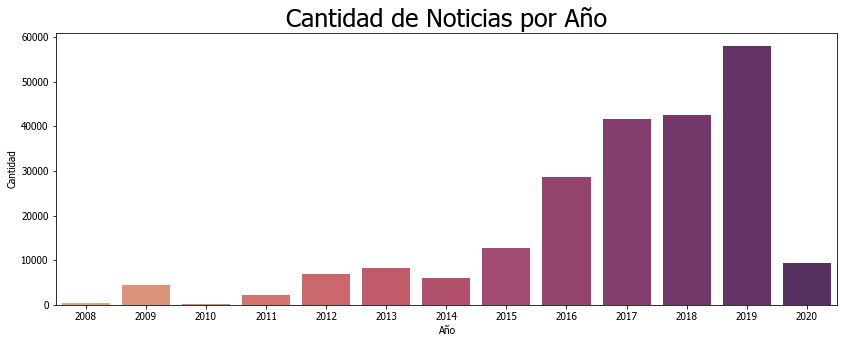

In [79]:
a = per_year.count().to_frame()
a.columns = ["Cantidad"]
a = a.rename_axis('Año').reset_index()

plt.figure(figsize=(14, 5))
plt.title("Cantidad de Noticias por Año", fontsize=25)
sns.barplot(x="Año", y="Cantidad", palette="flare", data=a)

Se puede observar que las noticias de las empresas que cotizan en bolsa fueron en ascenso. El dataset ofrece datos hasta el 13/02/2020 , por ello el bajo reporte de noticias en el año 2020. 

### Consigna
<li> Graficar la cantidad de noticias por ticker

Obverservamos la distribucion de los datos de Cantidad de Noticias por Ticker. Se observa que al graficarlo, no se puede apreciar la composición por la cantidad de tickers que posee el dataset. 

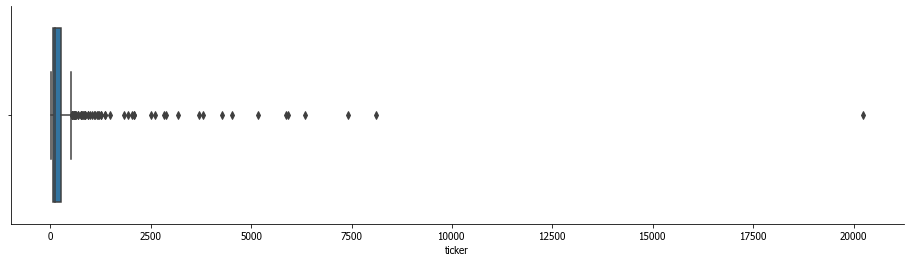

In [90]:
plt.figure(figsize=(16, 4))
sns.boxplot(x=df.ticker.value_counts())
sns.despine()

<AxesSubplot:title={'center':'Cantidad de noticias por Ticker'}, xlabel='Ticker', ylabel='Cantidad'>

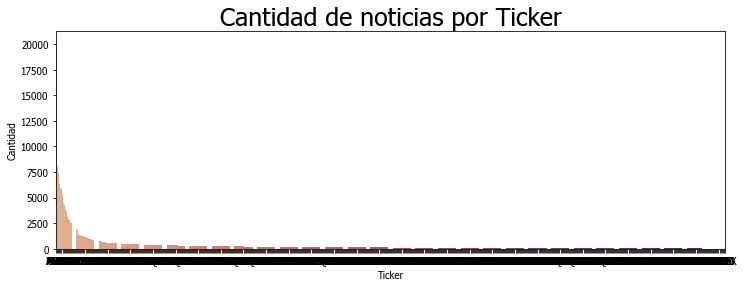

In [91]:
tickerGraph = pd.DataFrame()
tickerGraph = (df.ticker.value_counts() >= 1)
ticker1 = tickerGraph[tickerGraph == True]
lista1 = ticker1.index.tolist()

listTickerGraph = df_news[df_news.ticker.isin(lista1)]

listTickerGraph = listTickerGraph.ticker.value_counts().to_frame()
listTickerGraph.columns = ["Cantidad"]
listTickerGraph = listTickerGraph.rename_axis('Ticker').reset_index()

plt.figure(figsize=(12, 4))
plt.title("Cantidad de noticias por Ticker", fontsize=25)
sns.barplot(x="Ticker", y="Cantidad", palette="flare", data=listTickerGraph)

En el grafico anterior no se pueden observar con detalle los tickers, dada su cantidad. A continuación aplicamos un filtro para observar los tickers que poseen más de 1250 noticias.  

<AxesSubplot:title={'center':'Cantidad de noticias por Ticker'}, xlabel='Año', ylabel='Ticker'>

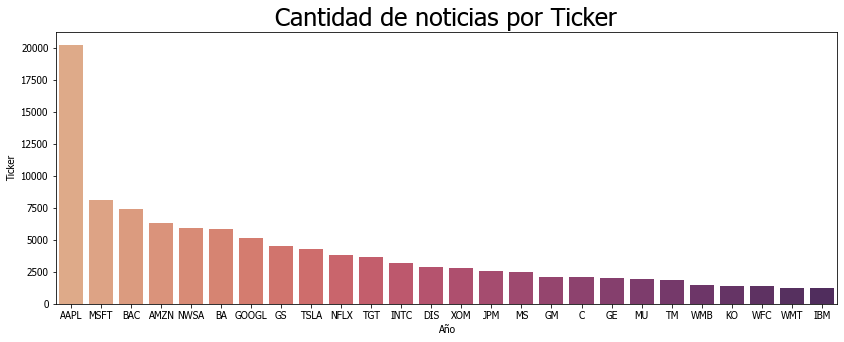

In [92]:
n = 1250
tickerWithMoreNews = pd.DataFrame()
tickerWithMoreNews = (df.ticker.value_counts() >= n)
ticker2 = tickerWithMoreNews[tickerWithMoreNews == True]
lista2 = ticker2.index.tolist()

listTickersWithMoreNews = df_news[df_news.ticker.isin(lista2)]
listTickersWithMoreNews = listTickersWithMoreNews.ticker.value_counts().to_frame()
listTickersWithMoreNews.columns = ["Ticker"]
listTickersWithMoreNews = listTickersWithMoreNews.rename_axis('Año').reset_index()

plt.figure(figsize=(14, 5))
plt.title("Cantidad de noticias por Ticker", fontsize=25)
sns.barplot(x="Año", y="Ticker", palette="flare", data=listTickersWithMoreNews)

Ahora podemos observar con detalle los tickers que poseen más de 1250 noticias. Son 26 tickers de diversos sectores de la industria. Lidera las menciones el ticker AAPL, seguido por MSFT y BAC.

### Consigna
<li> Graficar la cantidad de noticias por ticker y por año
    

In [93]:
df_news['release_date'] =  pd.to_datetime(df_news['release_date'])
df_count = df_news["ticker"].value_counts()
df_count = df_count.to_frame()

per_year = df_news.release_date.groupby(df_news.release_date.dt.year)
per_year.describe()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:679: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify 

,count,unique,top,freq,first,last
release_date,,,,,,
2008,479,72,2008-12-16,25,2008-10-02,2008-12-31
2009,4514,268,2009-10-15,57,2009-01-01,2009-10-31
2010,218,125,2010-10-18,4,2010-01-06,2010-12-30
2011,2220,287,2011-04-12,38,2011-01-03,2011-12-31
2012,7009,334,2012-11-19,71,2012-01-01,2012-12-31
2013,8313,339,2013-06-06,77,2013-01-01,2013-12-31
2014,5958,350,2014-07-17,50,2014-01-01,2014-12-31
2015,12661,363,2015-07-23,77,2015-01-01,2015-12-31
2016,28551,364,2016-07-28,228,2016-01-01,2016-12-31


## Conocemos los tickers que tuvieron al menos 1000 noticias en un año

In [240]:
per_ticker = df_news.ticker.groupby([df_news.ticker, df_news.release_date.dt.year]).count().to_frame()
per_ticker.columns = ["q_News"]
sup = per_ticker.q_News <= 1000
per_ticker_sup = per_ticker[sup == False]
y = per_ticker_sup.reset_index()
ticker_may_mil = y.ticker.unique()

In [241]:
df_news.columns

Index(['id', 'ticker', 'title', 'category', 'content', 'release_date',
       'provider', 'url', 'article_id'],
      dtype='object')

In [242]:
noticias_may_mil = df_news[df_news.ticker.isin(ticker_may_mil)]
per_ticker_mil = noticias_may_mil.ticker.groupby([df_news.ticker, df_news.release_date.dt.year]).count().to_frame()
per_ticker_mil.columns = ["q_News"]

In [243]:
per_ticker_mil = per_ticker_mil.reset_index().sort_values(by="q_News", ascending=False)

In [244]:
per_ticker_mil.describe()

,release_date,q_News
count,142.00000,142.000000
mean,2015.06338,569.816901
std,3.40049,893.145272
min,2008.00000,1.000000
25%,2013.00000,42.250000
50%,2015.00000,204.000000
75%,2018.00000,875.000000
max,2020.00000,5308.000000


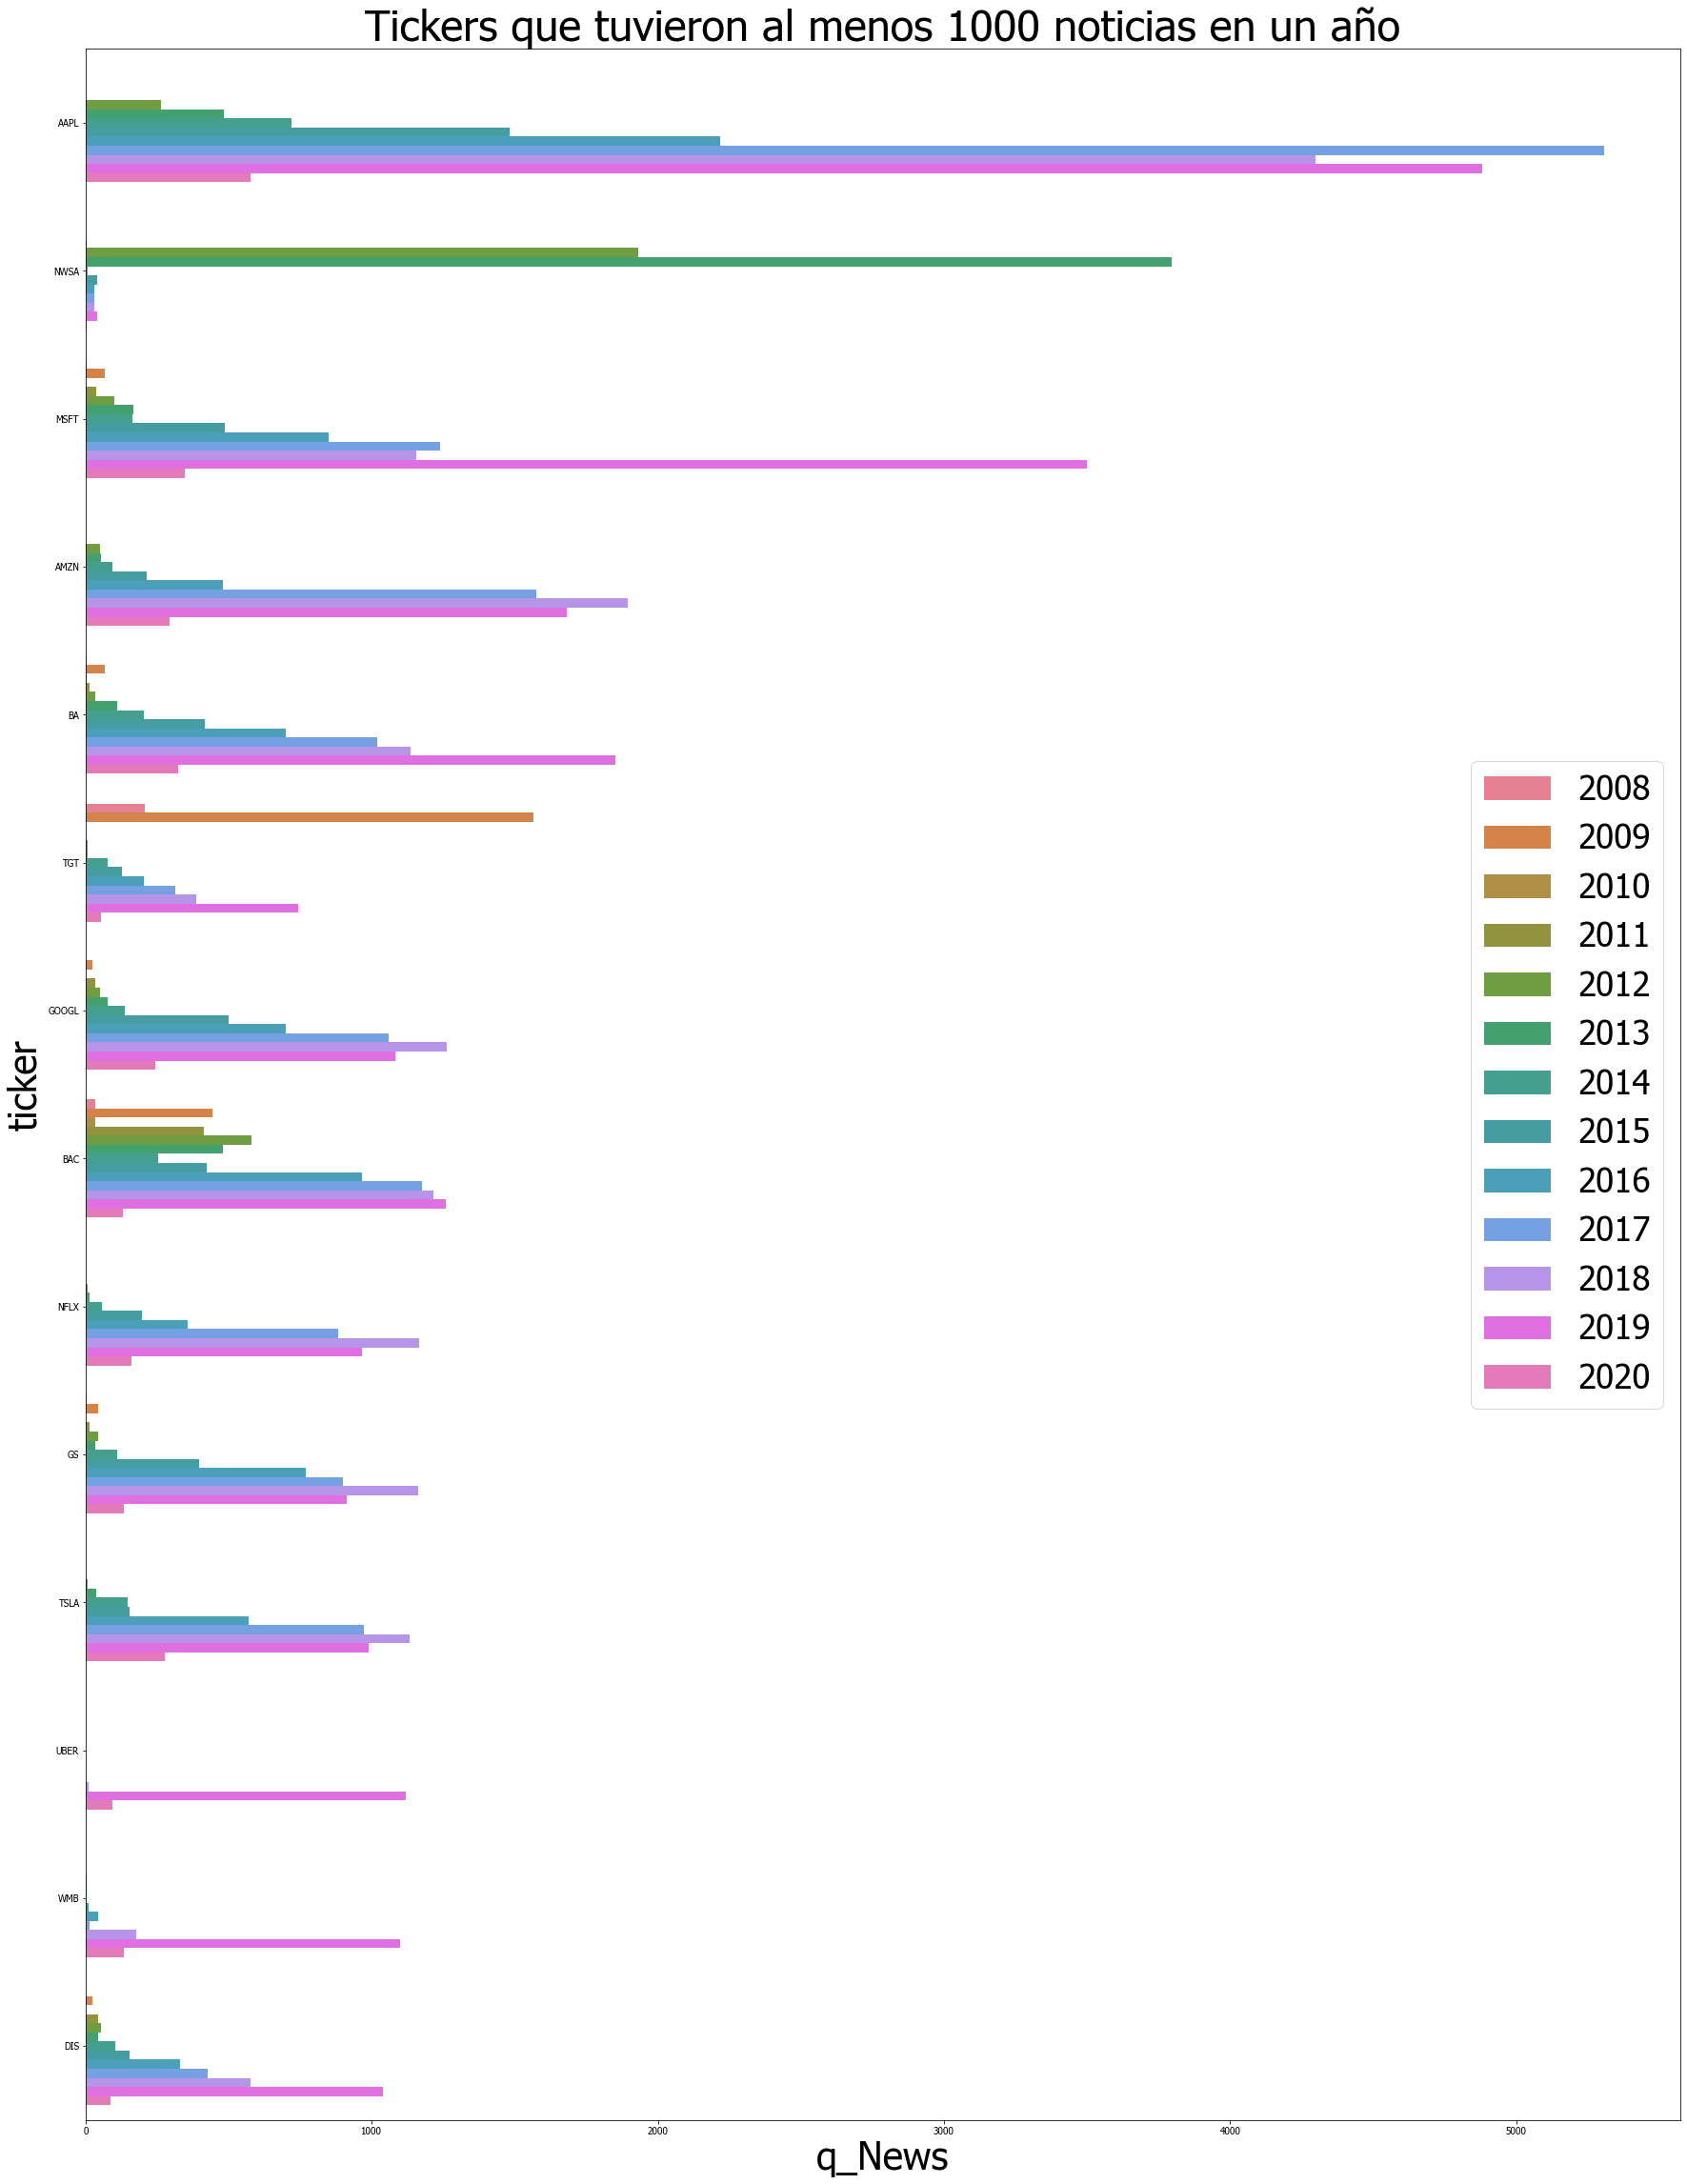

In [245]:
plt.figure(figsize=(30, 40))
#plt.rcParams.update({'axes.titlesize': '40', "axes.labelweight":"40"})
plt.title("Tickers que tuvieron al menos 1000 noticias en un año", fontsize=45)
sns.barplot(data=per_ticker_mil, x=per_ticker_mil.q_News, y=per_ticker_mil.ticker, hue=per_ticker_mil.release_date, palette="husl")
plt.legend(loc='center right', fontsize=35)
plt.show()

En lineas generales, se puede ver que AAPL es la compañía mas mencionada en la mayoria de los años. Se puede destacar a MSFT con un pico de noticias de 3499 provocado en el año 2019 y a la empresa con ticker NWSA con 3796 noticias en el año 2013

Para lograr una mejor visualización entre las empresas que mayores noticias tuvieron, en el siguiente gráfico visualizamos las que fueron mencionadas al menos 1600 veces en un año. 

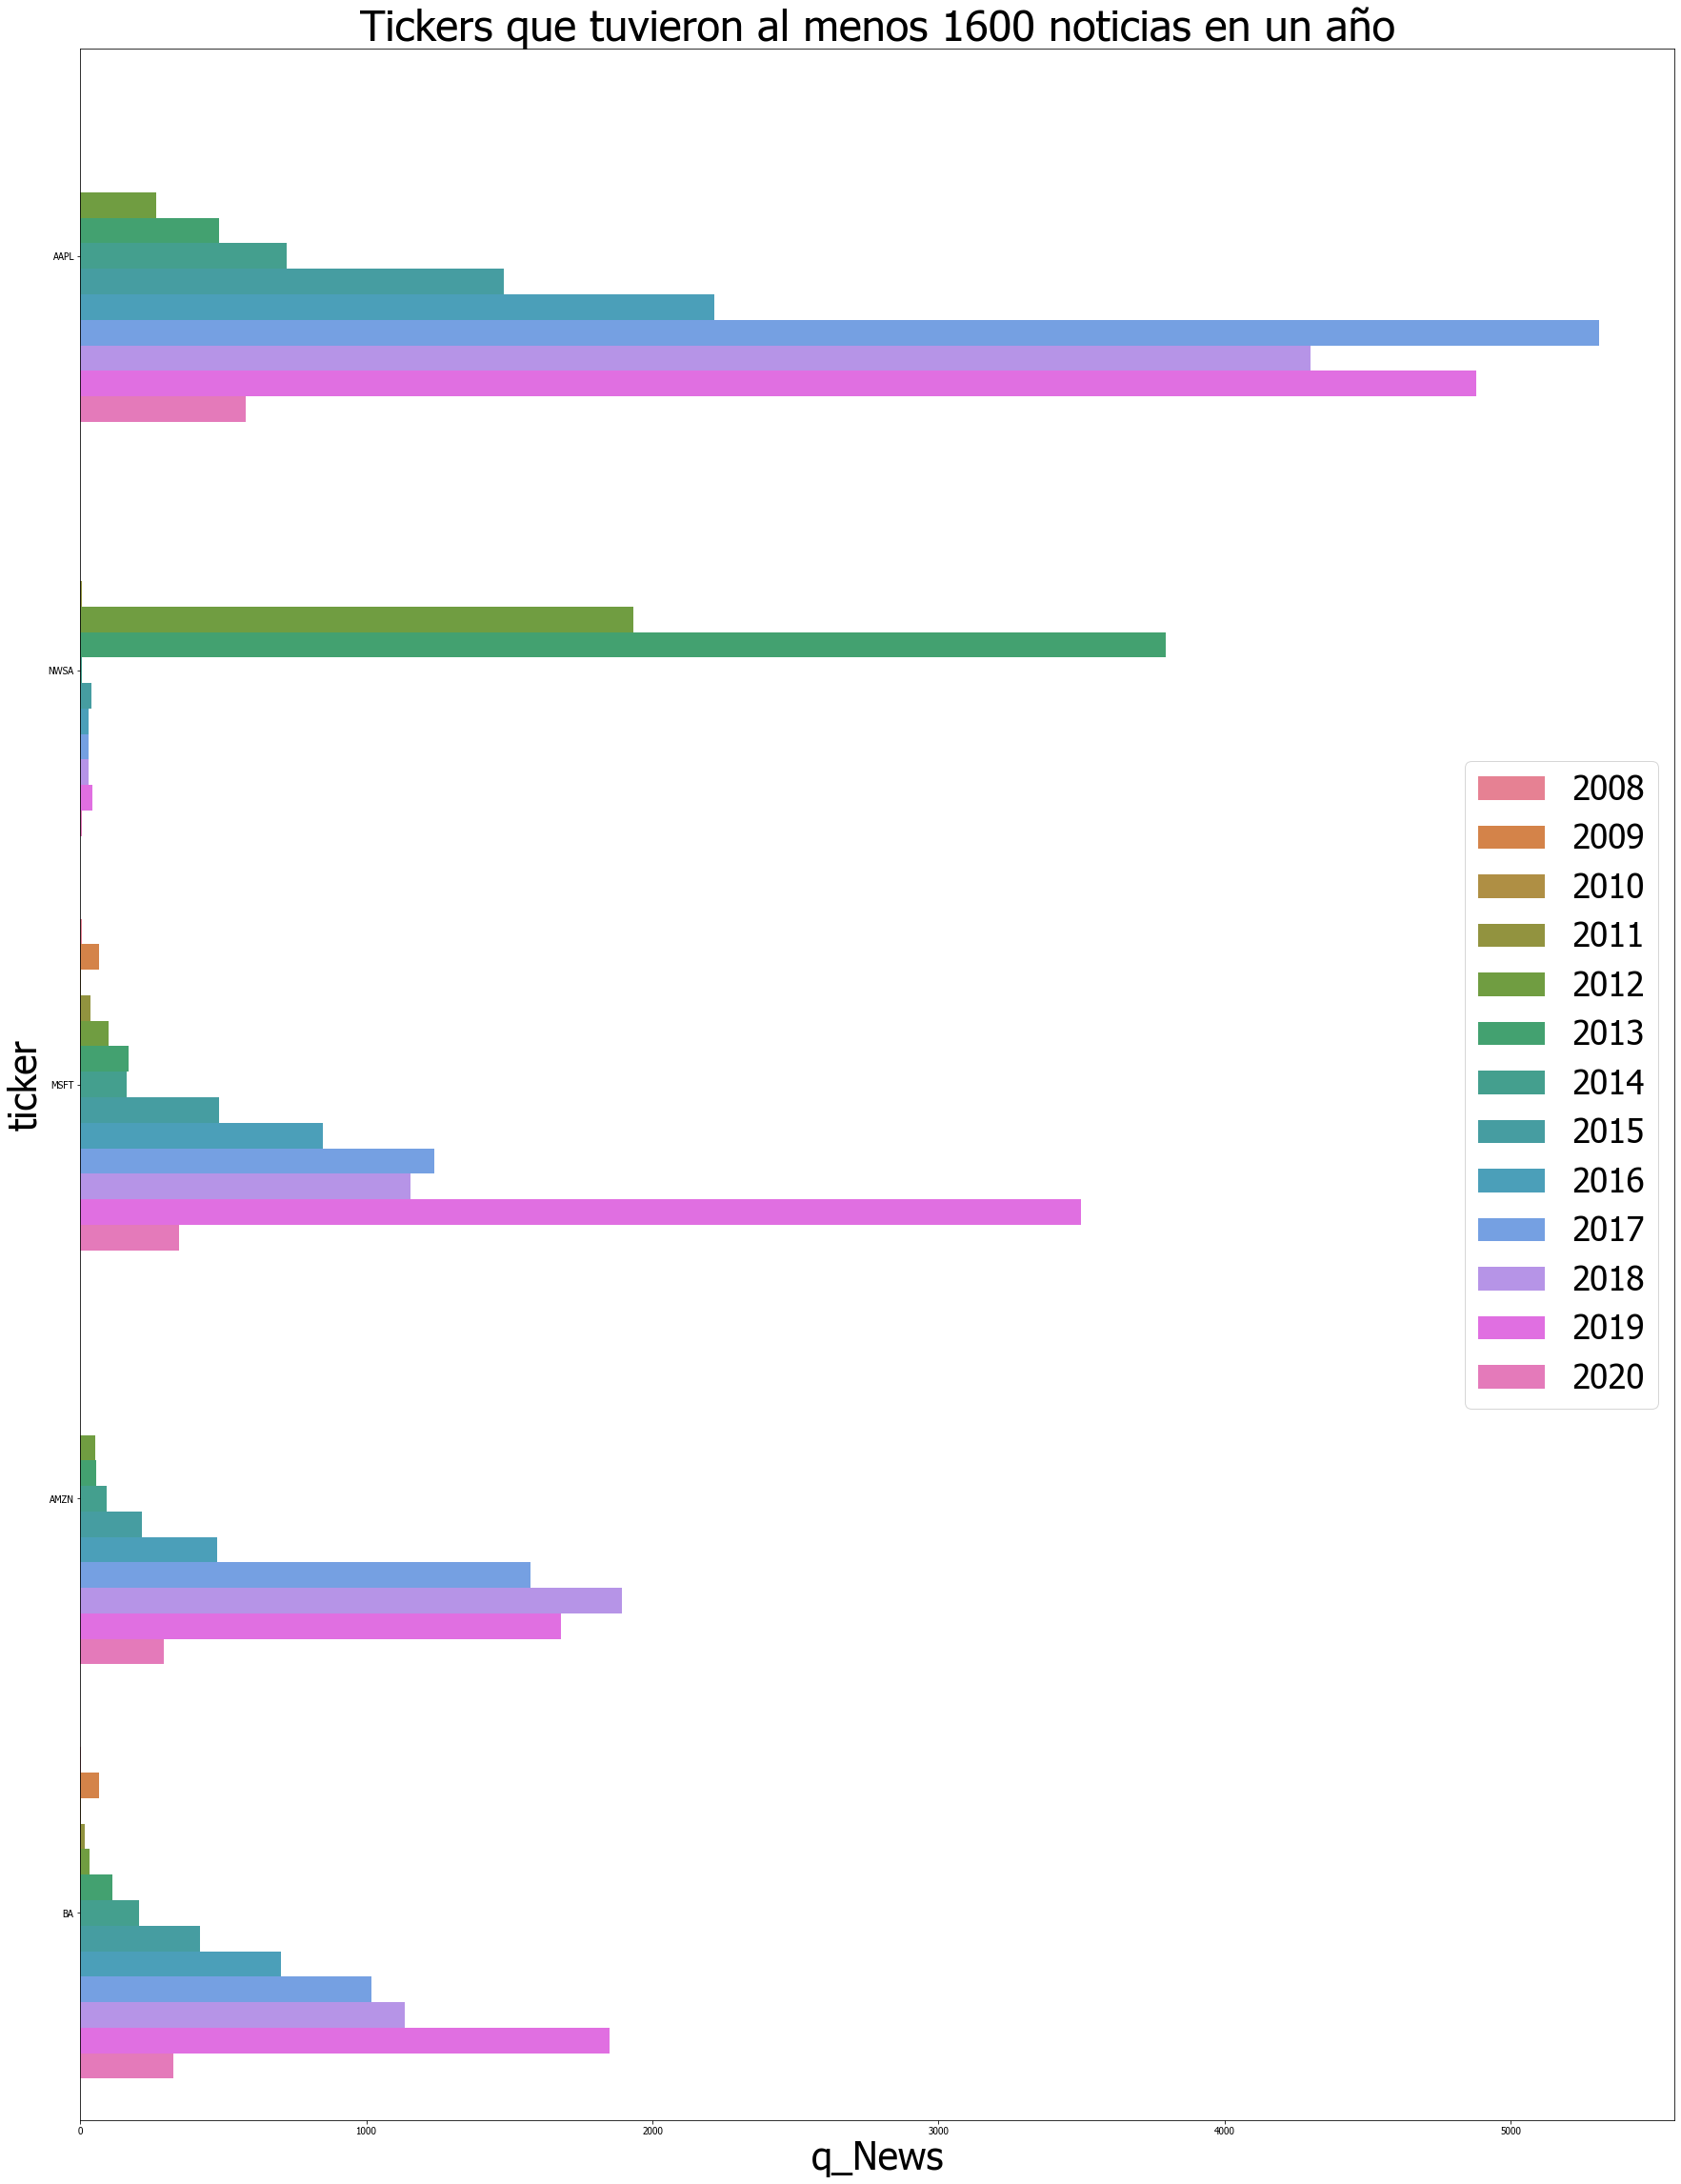

In [246]:
per_ticker_n = df_news.ticker.groupby([df_news.ticker, df_news.release_date.dt.year]).count().to_frame()
per_ticker_n.columns = ["q_News"]
sup = per_ticker_n.q_News <= 1600
per_ticker_n_sup = per_ticker_n[sup == False]
y = per_ticker_n_sup.reset_index()
ticker_may_mil_n = y.ticker.unique()

noticias_may_mil_n = df_news[df_news.ticker.isin(ticker_may_mil_n)]
per_ticker_n_mil = noticias_may_mil_n.ticker.groupby([df_news.ticker, df_news.release_date.dt.year]).count().to_frame()
per_ticker_n_mil.columns = ["q_News"]

noticias_may_mil_n = df_news[df_news.ticker.isin(ticker_may_mil_n)]
per_ticker_n_mil = noticias_may_mil_n.ticker.groupby([df_news.ticker, df_news.release_date.dt.year]).count().to_frame()
per_ticker_n_mil.columns = ["q_News"]

per_ticker_n_mil = per_ticker_n_mil.reset_index().sort_values(by="q_News", ascending=False)

plt.figure(figsize=(30, 40))
sns.barplot(data=per_ticker_n_mil, x=per_ticker_n_mil.q_News, y=per_ticker_n_mil.ticker, hue=per_ticker_n_mil.release_date, palette="husl")
plt.title("Tickers que tuvieron al menos 1600 noticias en un año", fontsize=45)
plt.legend(loc='center right', fontsize=35)
plt.show()